# Project 1

## Step 1: Load the data and perform basic operations.

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

##### 1. Load the data in using pandas.

In [2]:
act = pd.read_csv('../data/act.csv')
sat = pd.read_csv('../data/sat.csv')

##### 2. Print the first ten rows of each dataframe.

In [3]:
act.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [4]:
sat.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

### Data Columns
#### SAT:
1. **Unnamed:** The unnammed column is identifying the index for each row (axis=0)
2. **State:** The state within the United States of America
3. **Participation:** The measured participation rate in the SAT for the identified state
4. **Evidence-Based Reading and Writing:** The average score on the reading and writing portion of the SAT exam for the identified state.
5. **Math:** The average score on the math portion of the SAT exam for the identified state.
6. **Total:** The average total score for the SAT exam for the identified state.

#### ACT:
1. **Unnamed:** The unnammed column is identifying the index for each row (axis=0)
2. **State:** The state within the United States of America
3. **Participation:** The measured participation rate in the ACT for the identified state
4. **English:** The average score on the english portion of the ACT exam for the identified state.
5. **Math:** The average score on the math portion of the ACT exam for the identified state.
6. **Reading:** The average score on the reading portion of the ACT exam for the identified state.
7. **Science:** The average score on the science portion of the ACT exam for the identified state.
8. **Composite:** The average total composite score for the ACT exam for the identified state.

##### 4. Does the data look complete? Are there any obvious issues with the observations?

Examination of data:
1. In the SAT exam data, there is a state for 'National' which is not a state in the USA
2. In both the SAT and ACT exam data, there is a state for District of Columbia which is not a state in the USA
3. There are participation rates of 100% which should be extremly unlikely. 

I also think there should be additional data on the following to provide more insight on the participation rates by state:
1. Time of year the exams are available to the students to take the exam
2. The average distance from the students high school the exams are made available to the students
3. The participation rate by race would be a great demographic piece of data to analyze which races are participating the most and which are participating the least
4. As a follow up to number 3, each states average participation rate for each race
5. The cost of the exams by state 
6. Each states average household income

##### 5. Print the types of each column.

In [5]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
Unnamed: 0       52 non-null int64
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ KB


In [6]:
act.shape

(52, 8)

In [7]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
Unnamed: 0                            51 non-null int64
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [8]:
sat.shape

(51, 6)

In [9]:
act.head()

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [10]:
sat.head()

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055


**6. Do any types need to be reassigned? If so, go ahead and do it.**

In [11]:
act.dtypes

Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [12]:
act['Participation'] = act['Participation'].map(lambda p_cell: p_cell.replace('%',''))

In [13]:
act['Participation'] = act['Participation'].astype(float)

In [14]:
act['Participation'] = act['Participation'].div(100).round(2)

In [15]:
act.drop('Unnamed: 0', axis=1, inplace = True) # run this both data sets

In [16]:
act.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [17]:
sat.dtypes

Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [18]:
sat['Participation'] = sat['Participation'].map(lambda sp_cell: sp_cell.replace('%', ''))

In [19]:
sat['Participation'] = sat['Participation'].astype(float)

In [20]:
sat['Participation'] = sat['Participation'].div(100).round(2)

In [21]:
sat.drop('Unnamed: 0', axis=1, inplace=True)

In [22]:
sat.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [23]:
new_act_dict = act.set_index('State').to_dict()
new_act_dict
new_sat_dict = sat.set_index('State').to_dict()
new_sat_dict['Participation']

{'Alabama': 0.05,
 'Alaska': 0.38,
 'Arizona': 0.3,
 'Arkansas': 0.03,
 'California': 0.53,
 'Colorado': 0.11,
 'Connecticut': 1.0,
 'Delaware': 1.0,
 'District of Columbia': 1.0,
 'Florida': 0.83,
 'Georgia': 0.61,
 'Hawaii': 0.55,
 'Idaho': 0.93,
 'Illinois': 0.09,
 'Indiana': 0.63,
 'Iowa': 0.02,
 'Kansas': 0.04,
 'Kentucky': 0.04,
 'Louisiana': 0.04,
 'Maine': 0.95,
 'Maryland': 0.69,
 'Massachusetts': 0.76,
 'Michigan': 1.0,
 'Minnesota': 0.03,
 'Mississippi': 0.02,
 'Missouri': 0.03,
 'Montana': 0.1,
 'Nebraska': 0.03,
 'Nevada': 0.26,
 'New Hampshire': 0.96,
 'New Jersey': 0.7,
 'New Mexico': 0.11,
 'New York': 0.67,
 'North Carolina': 0.49,
 'North Dakota': 0.02,
 'Ohio': 0.12,
 'Oklahoma': 0.07,
 'Oregon': 0.43,
 'Pennsylvania': 0.65,
 'Rhode Island': 0.71,
 'South Carolina': 0.5,
 'South Dakota': 0.03,
 'Tennessee': 0.05,
 'Texas': 0.62,
 'Utah': 0.03,
 'Vermont': 0.6,
 'Virginia': 0.65,
 'Washington': 0.64,
 'West Virginia': 0.14,
 'Wisconsin': 0.03,
 'Wyoming': 0.03}

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [24]:
sat_dict_column = sat.to_dict('list')
#sat_dict_column

In [25]:
act_dict_column = act.to_dict('list')
#act_dict_column

##### 9. Merge the dataframes on the state column.

In [26]:
sat.set_index('State', inplace=True)
act.set_index('State', inplace=True)

In [27]:
country_exam_scores_df = pd.merge(sat,act, on='State')

In [28]:
sat.head()

,Participation,Evidence-Based Reading and Writing,Math,Total
State,,,,
Alabama,0.05,593,572,1165
Alaska,0.38,547,533,1080
Arizona,0.30,563,553,1116
Arkansas,0.03,614,594,1208
California,0.53,531,524,1055


In [29]:
act.head(2)

,Participation,English,Math,Reading,Science,Composite
State,,,,,,
National,0.6,20.3,20.7,21.4,21.0,21.0
Alabama,1.0,18.9,18.4,19.7,19.4,19.2


In [30]:
country_exam_scores_df.head()

,Participation_x,Evidence-Based Reading and Writing,Math_x,Total,Participation_y,English,Math_y,Reading,Science,Composite
State,,,,,,,,,,
Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [31]:
country_exam_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 10 columns):
Participation_x                       51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math_x                                51 non-null int64
Total                                 51 non-null int64
Participation_y                       51 non-null float64
English                               51 non-null float64
Math_y                                51 non-null float64
Reading                               51 non-null float64
Science                               51 non-null float64
Composite                             51 non-null float64
dtypes: float64(7), int64(3)
memory usage: 4.4+ KB


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [32]:
new_columns_dict = {
        'Participation_x':'participation_rate_sat',
        'Evidence-Based Reading and Writing':'reading_writing_avg_sat',
        'Math_x':'math_avg_sat',
        'Total':'total_avg_sat',
        'Participation_y':'participation_rate_act',
        'English':'english_avg_act',
        'Math_y':'math_avg_act',
        'Reading':'reading_avg_act',
        'Science':'science_avg_act',
        'Composite':'total_avg_act',
    }
country_exam_scores_df.rename(columns=new_columns_dict, inplace=True)

In [33]:
country_exam_scores_df.head()

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
State,,,,,,,,,,
Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [34]:
country_exam_scores_df.describe()

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,547.627451,1126.098039,0.652549,20.931373,21.182353,22.013725,21.041176,21.519608
std,0.352766,45.666901,84.909119,92.494812,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695
min,0.020000,482.000000,52.000000,950.000000,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,0.040000,533.500000,522.000000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [35]:
def std_deviation_funct(numbers):
    mean = np.mean(numbers)     
    std = (sum([(n-mean)**2 for n in numbers])/(len(numbers)-1))**.5
    return std

In [36]:
numbers = [4,8,6,12]

In [37]:
std_deviation_funct(numbers)

3.415650255319866

In [38]:
country_exam_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 10 columns):
participation_rate_sat     51 non-null float64
reading_writing_avg_sat    51 non-null int64
math_avg_sat               51 non-null int64
total_avg_sat              51 non-null int64
participation_rate_act     51 non-null float64
english_avg_act            51 non-null float64
math_avg_act               51 non-null float64
reading_avg_act            51 non-null float64
science_avg_act            51 non-null float64
total_avg_act              51 non-null float64
dtypes: float64(7), int64(3)
memory usage: 4.4+ KB


In [39]:
country_exam_scores_df.loc[:,"math_avg_sat"].std()

84.90911865855486

In [40]:
country_exam_scores_df[['math_avg_sat']].apply(std_deviation_funct)

math_avg_sat    84.909119
dtype: float64

In [41]:
country_exam_scores_df.apply(std_deviation_funct)

participation_rate_sat      0.352766
reading_writing_avg_sat    45.666901
math_avg_sat               84.909119
total_avg_sat              92.494812
participation_rate_act      0.321408
english_avg_act             2.353677
math_avg_act                1.981989
reading_avg_act             2.067271
science_avg_act             3.182463
total_avg_act               2.020695
dtype: float64

In [42]:
sd = list(country_exam_scores_df.apply(std_deviation_funct))
sd

[0.35276632270013036,
 45.66690138768932,
 84.90911865855486,
 92.49481172519046,
 0.32140842015886834,
 2.35367713980303,
 1.9819894936505533,
 2.0672706264873146,
 3.182462975155452,
 2.020694891154341]

In [43]:
mask_df = country_exam_scores_df.select_dtypes(include=[np.number])
mask_df.describe()

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,547.627451,1126.098039,0.652549,20.931373,21.182353,22.013725,21.041176,21.519608
std,0.352766,45.666901,84.909119,92.494812,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695
min,0.020000,482.000000,52.000000,950.000000,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,0.040000,533.500000,522.000000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000


## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [44]:
mask_df.loc['SD']= sd

In [45]:
mask_df.tail()

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
State,,,,,,,,,,
Washington,0.640000,541.000000,534.000000,1075.000000,0.290000,20.900000,21.900000,22.100000,22.000000,21.900000
West Virginia,0.140000,558.000000,528.000000,1086.000000,0.690000,20.000000,19.400000,21.200000,20.500000,20.400000
Wisconsin,0.030000,642.000000,649.000000,1291.000000,1.000000,19.700000,20.400000,20.600000,20.900000,20.500000
Wyoming,0.030000,626.000000,604.000000,1230.000000,1.000000,19.400000,19.800000,20.800000,20.600000,20.200000
SD,0.352766,45.666901,84.909119,92.494812,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695


In [46]:
country_exam_scores_df.tail()

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
State,,,,,,,,,,
Virginia,0.65,561,541,1102,0.29,23.5,23.3,24.6,23.5,23.8
Washington,0.64,541,534,1075,0.29,20.9,21.9,22.1,22.0,21.9
West Virginia,0.14,558,528,1086,0.69,20.0,19.4,21.2,20.5,20.4
Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,20.5
Wyoming,0.03,626,604,1230,1.00,19.4,19.8,20.8,20.6,20.2


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [47]:
country_exam_scores_df.sort_values('participation_rate_sat', ascending=False).head()

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
State,,,,,,,,,,
District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2
Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1
Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [48]:
country_exam_scores_df[(country_exam_scores_df['participation_rate_sat'] > .5)].head()

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
State,,,,,,,,,,
California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8
Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2
Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1
District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2
Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,19.8


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

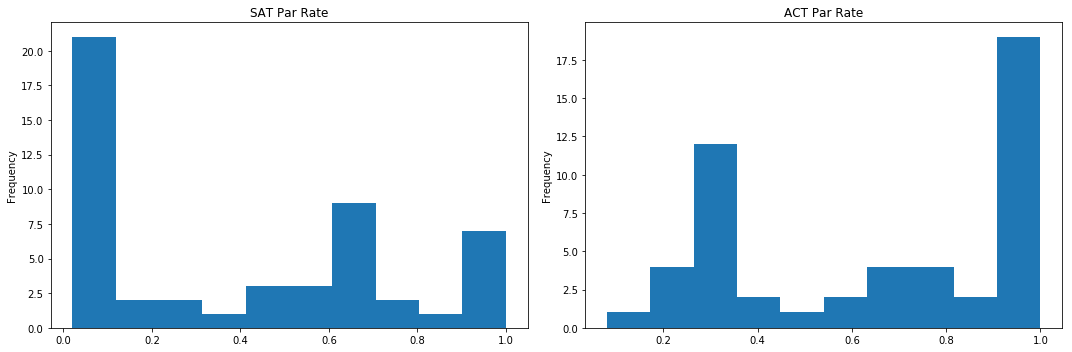

In [49]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5));

# SAT Rate
country_exam_scores_df['participation_rate_sat'].plot(title = 'SAT Par Rate', kind='hist', ax=ax[0]);

# ACT Rate
country_exam_scores_df['participation_rate_act'].plot(title = 'ACT Par Rate', kind='hist', ax=ax[1]);

plt.tight_layout()

##### 17. Plot the Math(s) distributions from both data sets.

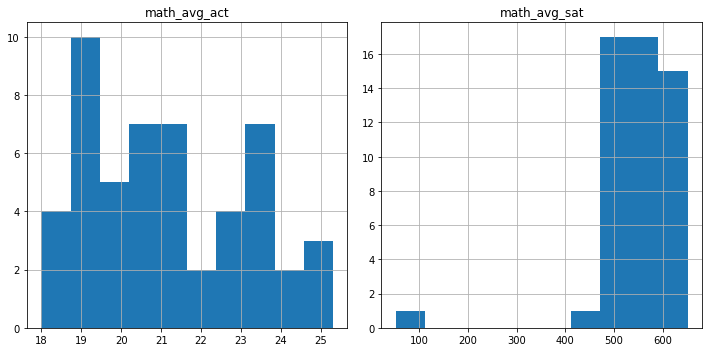

In [50]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5));

country_exam_scores_df.hist('math_avg_act', ax=ax[0]);

country_exam_scores_df.hist('math_avg_sat', ax=ax[1]);

plt.tight_layout();

##### 18. Plot the Verbal distributions from both data sets.

In [51]:
country_exam_scores_df.head(2)

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
State,,,,,,,,,,
Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8


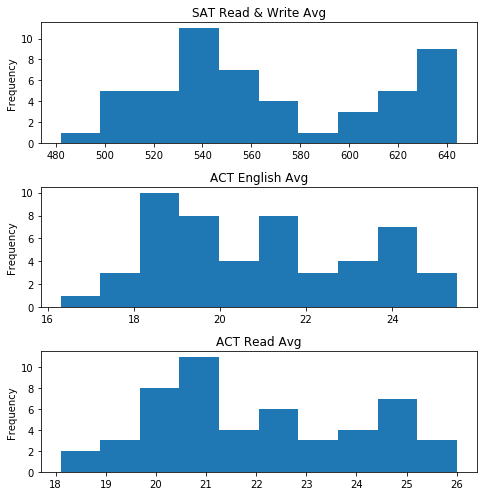

In [52]:
figure, ax = plt.subplots(nrows=3, ncols=1, figsize=(7, 7));

# SAT Reading & Wrting
country_exam_scores_df['reading_writing_avg_sat'].plot(title = 'SAT Read & Write Avg', kind='hist', ax=ax[0]);

# ACT English
country_exam_scores_df['english_avg_act'].plot(title = 'ACT English Avg', kind='hist', ax=ax[1]);

# ACT Read
country_exam_scores_df['reading_avg_act'].plot(title = 'ACT Read Avg', kind='hist', ax=ax[2])

plt.tight_layout()

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

That the mean of the distribution is going to be a normal distribution and that as our number of observations increases we'll approach a normal distribution (CLT).

##### 20. Does this assumption hold true for any of our columns? Which?

The assumption doesn't look to hold true as none of the columns look as though they have a totally normal distribution. Meaning the mean is skewed to the left or right of the distribution.

##### 21. Plot some scatterplots examining relationships between all variables.

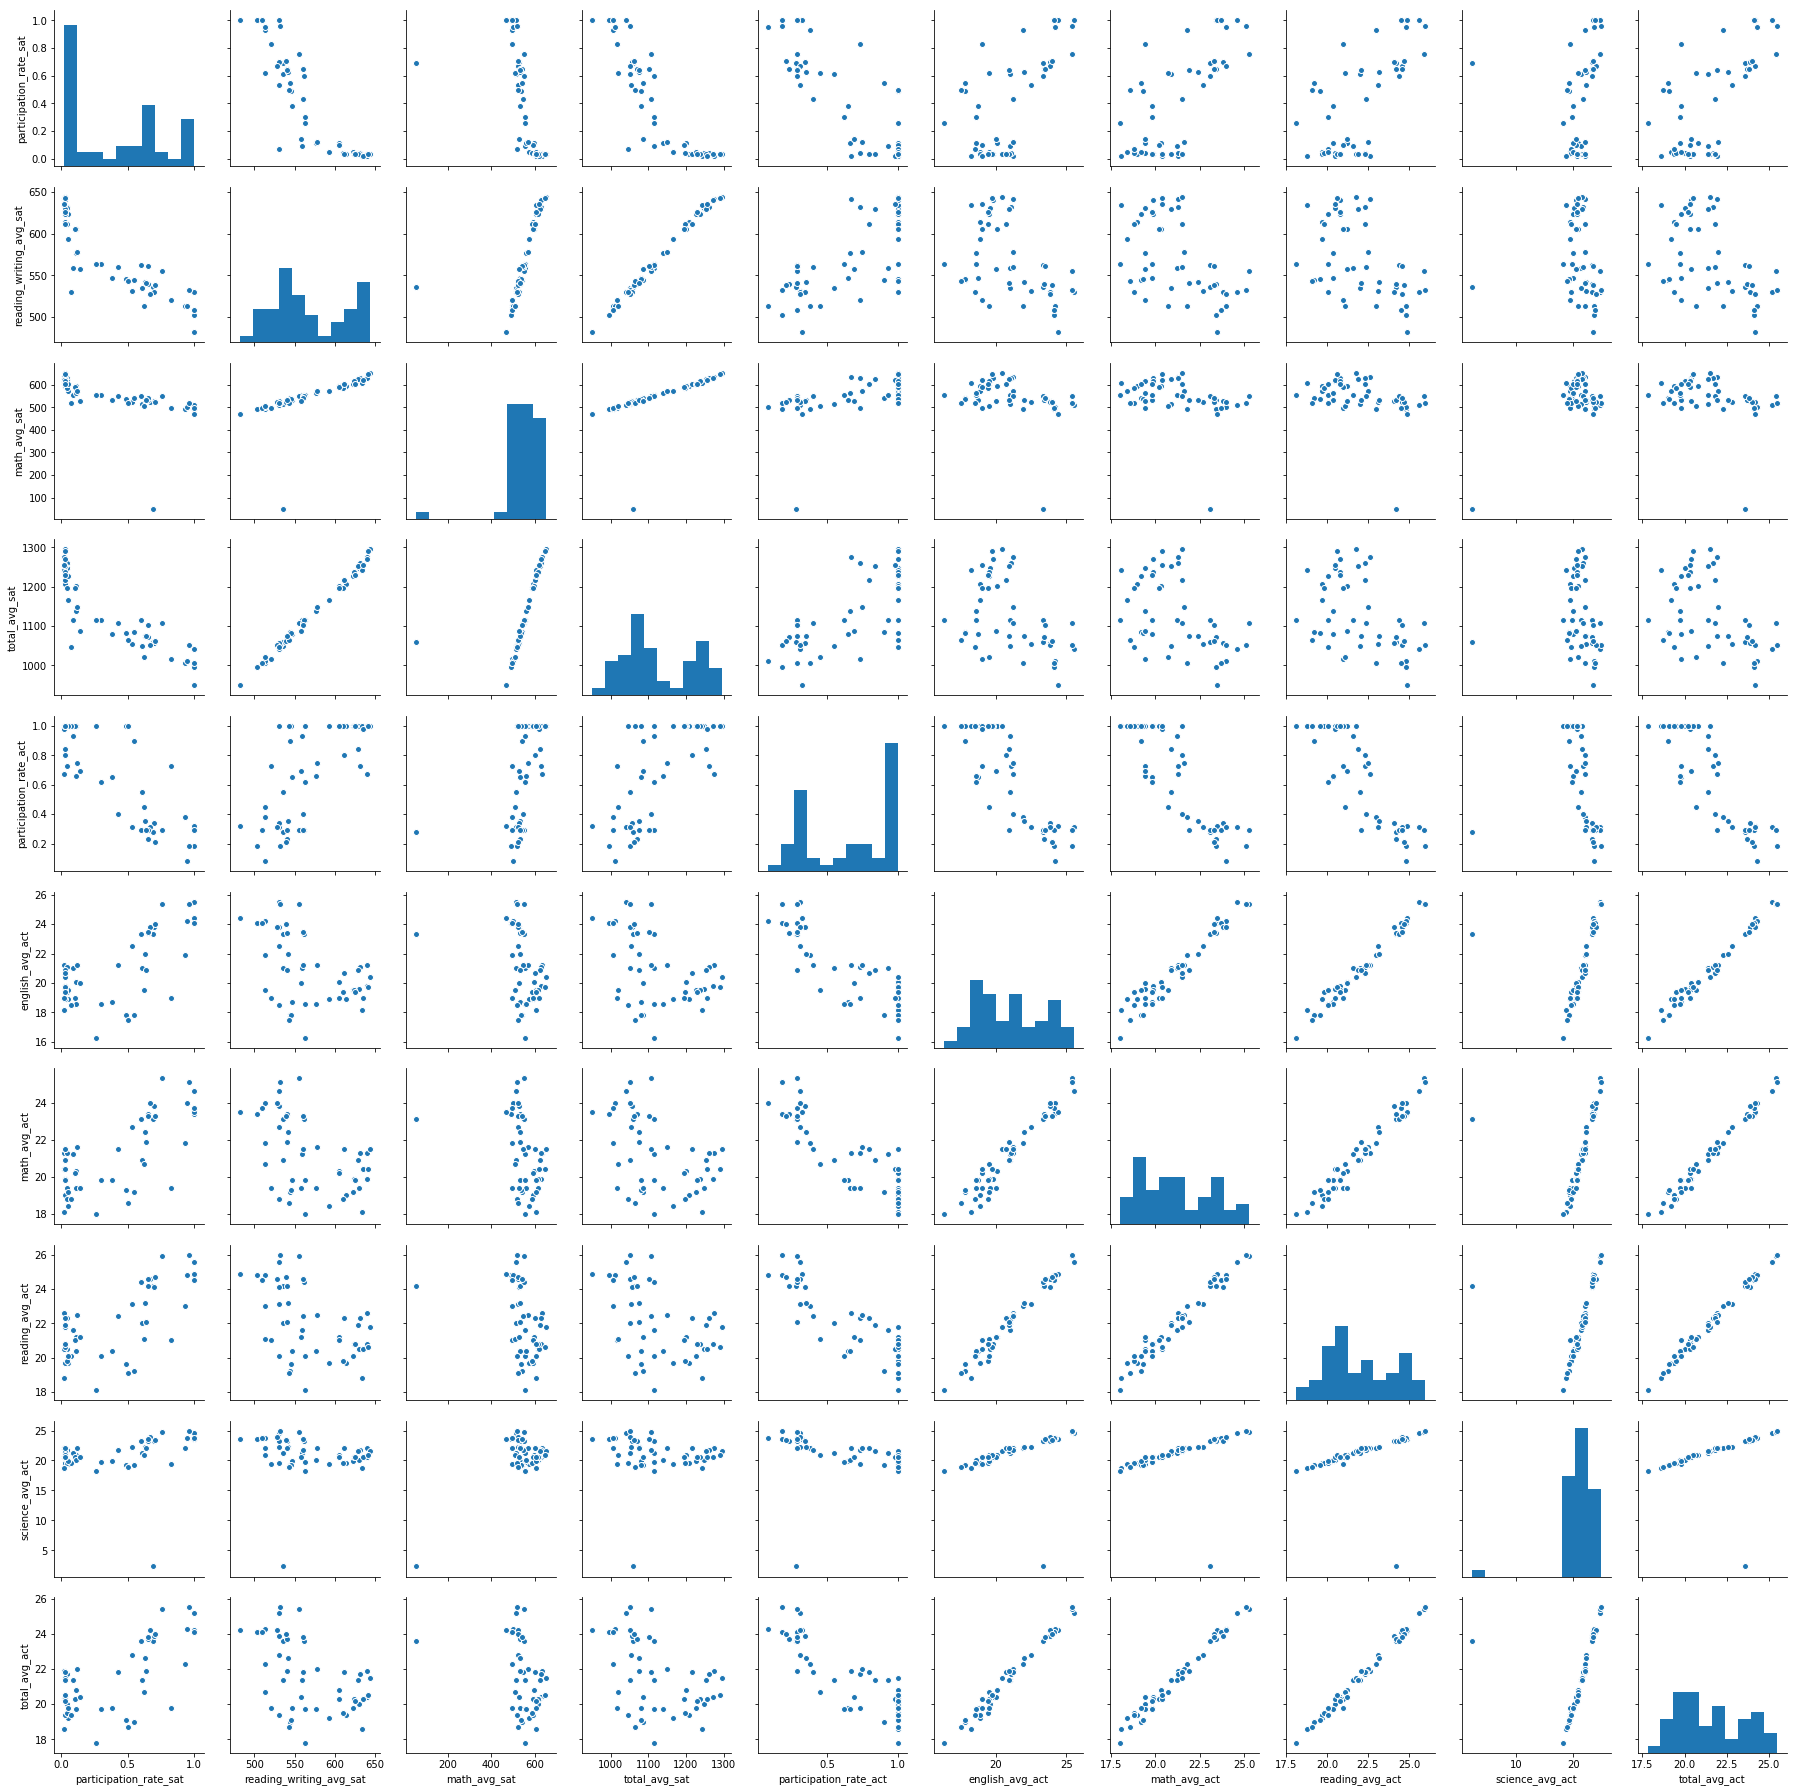

In [53]:
sns.pairplot(country_exam_scores_df)

##### 22. Are there any interesting relationships to note?

**Interesting relationships:**
1. Looks like almost a perfect linear relationship between each states total SAT score and each states avg SAT reading and writing score
2. Looks like almost a perfect positive correlation between each states total ACT score and 3 of the 4 of the individual portions of the ACT exam (reading, math, english)
3. The total avg act has a negative correlation with act participation rate meaning that as participation rates go up the total avg goes down and vice versa
4. The average participation rate on the ACT and SAT are negatively correlated meaning that as participation rates go up the total avg goes down and vice versa

In [54]:
country_exam_scores_df.head(1)

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
State,,,,,,,,,,
Alabama,0.05,593,572,1165,1.0,18.9,18.4,19.7,19.4,19.2


##### 23. Create box plots for each variable. 

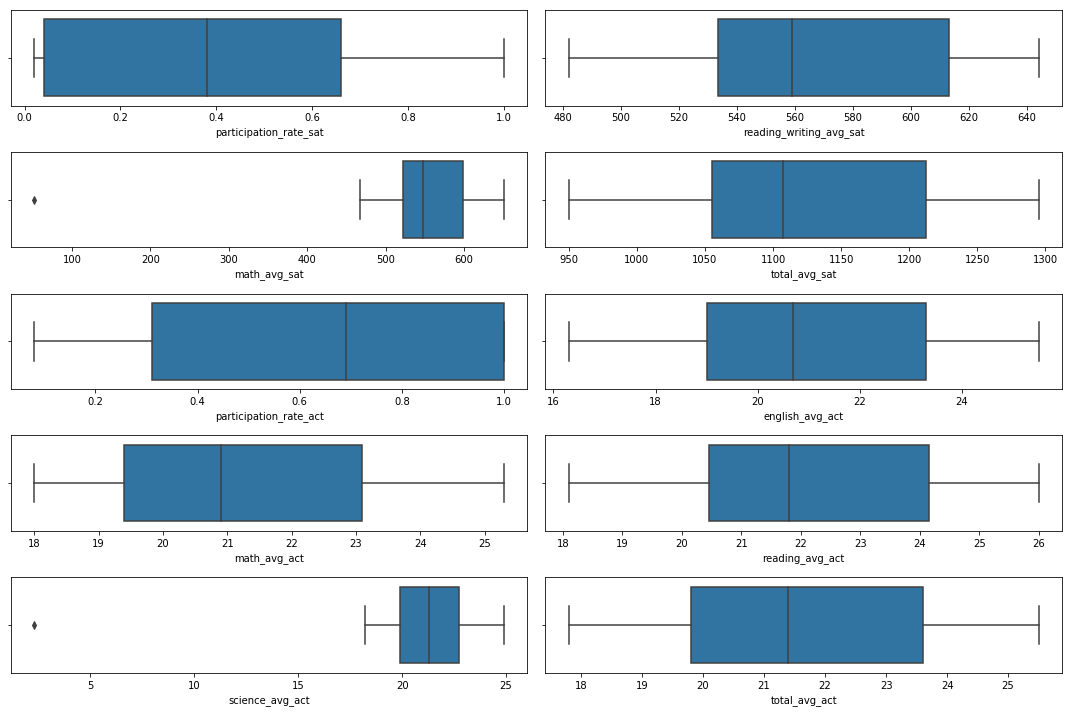

In [55]:
figure, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 10));

sns.boxplot(country_exam_scores_df.participation_rate_sat, ax=ax[0,0]);
sns.boxplot(country_exam_scores_df.reading_writing_avg_sat, ax=ax[0,1]);
sns.boxplot(country_exam_scores_df.math_avg_sat, ax=ax[1,0]);
sns.boxplot(country_exam_scores_df.total_avg_sat, ax=ax[1,1]);
sns.boxplot(country_exam_scores_df.participation_rate_act, ax=ax[2,0]);
sns.boxplot(country_exam_scores_df.english_avg_act, ax=ax[2,1]);
sns.boxplot(country_exam_scores_df.math_avg_act, ax=ax[3,0]);
sns.boxplot(country_exam_scores_df.reading_avg_act, ax=ax[3,1]);
sns.boxplot(country_exam_scores_df.science_avg_act, ax=ax[4,0]);
sns.boxplot(country_exam_scores_df.total_avg_act, ax=ax[4,1]);

plt.tight_layout();

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

When reviewing distributions we want to examine three main things:

1. The measures of centrality which are the mean, median, and mode
2. The measures of spread which I will narrow down to standard deviation and variance
3. The shapes of our distributions which spcifically is the skew and symmetry of the distribution

Using the describe function (in the cell below) we can get an output displaying the attributes of centrality and spread. This output is displayed below.

For the shape and symmetry we can review the distribution plots which were apart of the output in question 21 with the seaborn pairplot and show the following:

    SAT:
        - SAT Part Rate : Right Skewed -Most observations are to the right (postive) of the mean
        - SAT Reading Avg : Right Skewed -Most observations are to the right (postive) of the mean
        - SAT Math Avg : Left Skewed -Most observations are to the left (negative) of the mean
        - SAT Total Avg : Right Skewed -Most observations are to the right (postive) of the mean

    ACT:
        - ACT Part Rate : Left Skewed -Most observations are to the left (negative) of the mean
        - ACT English Avg : Right Skewed -Most observations are to the right (postive) of the mean
        - ACT Math Avg : Right Skewed -Most observations are to the right (postive) of the mean
        - ACT Reading Avg : Right Skewed -Most observations are to the right (postive) of the mean
        - ACT Science Avg : Left Skewed -Most observations are to the left (negative) of the mean
        - ACT Total Avg : Right Skewed -Most observations are to the right (postive) of the mean

In [56]:
country_exam_scores_df.describe()

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,547.627451,1126.098039,0.652549,20.931373,21.182353,22.013725,21.041176,21.519608
std,0.352766,45.666901,84.909119,92.494812,0.321408,2.353677,1.981989,2.067271,3.182463,2.020695
min,0.020000,482.000000,52.000000,950.000000,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,0.040000,533.500000,522.000000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000


##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

Generalize the relationships between each. Identify which ones are positive, which ones are negative

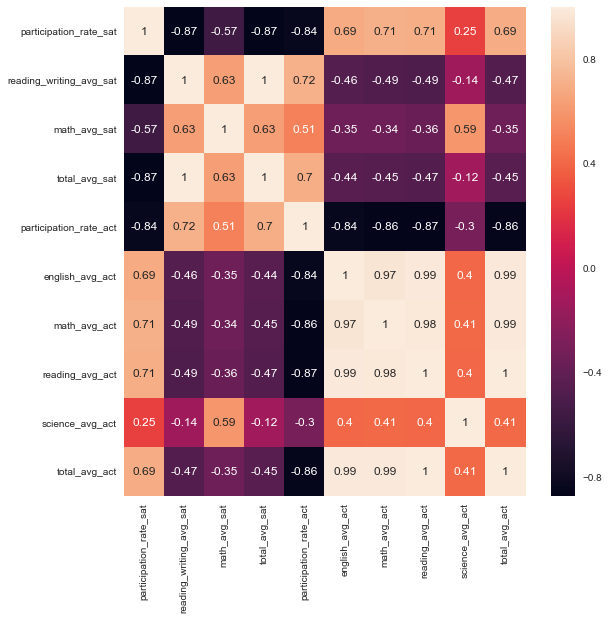

In [57]:
plt.figure(figsize=(9,9))
sns.set(font_scale=1)
sns.heatmap(country_exam_scores_df.corr(), annot=True);

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

In [58]:
sat_mean = country_exam_scores_df['participation_rate_sat'].mean()
act_mean = country_exam_scores_df['participation_rate_act'].mean()

sat_mean, act_mean

(0.39803921568627454, 0.6525490196078431)

$H_0$: The mean of the SAT Participation Rates **is** equal to the mean of the ACT Participation Rates<br>
$H_1$: The mean of the SAT Participation Rates **is not** equal to the mean of the ACT Participation Rates

- Alpha = 0.05

In [59]:
stats.ttest_ind(country_exam_scores_df['participation_rate_sat'], country_exam_scores_df['participation_rate_act'])

Ttest_indResult(statistic=-3.8085778908170544, pvalue=0.00024134203698662353)

#### Reference (After reviewing results use this to confirm)
- If $p < \alpha$, then there is evidence to reject the null hypothesis, i.e., something's going on, i.e., a statisically significant difference!
- If $p > \alpha$, then there is insufficient evidence to reject the null hypothesis, i.e., business as usual, i.e., there is no statistical difference between your two groups.


#### Results from t-test output
The t-test above shows that the p-value is less than the alpha. This means we can reject the $H_0$ hypothesis.

- This proves there is a significant statistical difference between the means of the SAT Participation rates and ACT Participation rates.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [60]:
sample_mean = country_exam_scores_df['participation_rate_sat'].mean()
z_star = 1.96                          ## 95 % confidence interval
sigma = country_exam_scores_df['participation_rate_sat'].std()
n = len(country_exam_scores_df)

low_end_sat = sample_mean - z_star * sigma / n ** 0.5

high_end_sat = sample_mean + z_star * sigma / n ** 0.5

In [61]:
low_end_sat, high_end_sat

(0.3012207711116876, 0.4948576602608615)

**SAT Interpretation**

The interpretation of this confidence interval would be that when we sample a specific portion of the population we'd expect the mean of this sample to be in this range 95% of the time.

Range:
    - (0.3012207711116876, 0.4948576602608615)

In [62]:
sample_mean = country_exam_scores_df['participation_rate_act'].mean()
z_star = 1.96                          ## 95 % confidence interval
sigma = country_exam_scores_df['participation_rate_act'].std()
n = len(country_exam_scores_df['participation_rate_act'])

low_end_act = sample_mean - z_star * sigma / n ** 0.5

high_end_act = sample_mean + z_star * sigma / n ** 0.5

In [63]:
low_end_act, high_end_act

(0.5643369049287186, 0.7407611342869675)

**ACT Interpretation**

The interpretation of this confidence interval would be that when we sample a specific portion of the population we'd expect the mean of this sample to be in this range 95% of the time.

Range:
    - (0.5643369049287186, 0.7407611342869675)

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

In [64]:
sat_mean = country_exam_scores_df['participation_rate_sat'].mean()
act_mean = country_exam_scores_df['participation_rate_act'].mean()

sat_mean, act_mean

(0.39803921568627454, 0.6525490196078431)

The answer to 27 is not surprising because the 95% confidence interval confirms the rejection of our Null Hypothesis that the means are not equal.
- SAT Mean = 0.398 and SAT 95% confidence interval = (0.301, 0.494)
- ACT Mean = 0.652 and SAT 95% confidence interval = (0.564, 0.740)

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

The data is indicating a negative correlation between the SAT Math Average and ACT Math Average indicating that as SAT Math score averages increase the ACT Math score avgerages decrease. The negative correlation is not extremely strong so I would recommend not generating a correlation. 

In [65]:
country_exam_scores_df.corr()[['math_avg_sat', 'math_avg_act']]

,math_avg_sat,math_avg_act
participation_rate_sat,-0.566558,0.710697
reading_writing_avg_sat,0.628405,-0.486126
math_avg_sat,1.000000,-0.340906
total_avg_sat,0.632648,-0.454116
participation_rate_act,0.507670,-0.861114
english_avg_act,-0.345342,0.967803
math_avg_act,-0.340906,1.000000
reading_avg_act,-0.363099,0.979630
science_avg_act,0.594714,0.412318
total_avg_act,-0.346335,0.990451


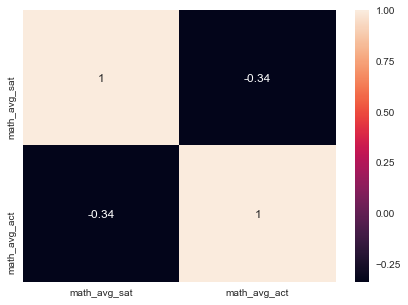

In [66]:
plt.figure(figsize=(7,5))
sns.set(font_scale=1)
sns.heatmap(country_exam_scores_df[['math_avg_sat', 'math_avg_act']].corr(), annot=True);

<Figure size 1440x360 with 0 Axes>

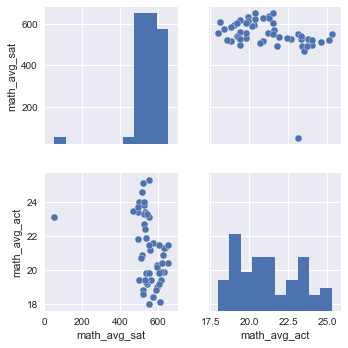

In [67]:
plt.figure(figsize=(20,5));
sns.pairplot(country_exam_scores_df[['math_avg_sat', 'math_avg_act']]);
plt.tight_layout();

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

Given just the data provided in this dataset performing statistical inference on the relationship between SAT and ACT doesn't make sense. The participation rates between states isn't enough to give us insight into comparing each state mainly, because the population size differences between each of the states. We need more granular data on the students taking the standardized exams to get into the statistical inferences that we'd want to explore.

### Presentation Code and Materials Below

In [68]:
a_mean = country_exam_scores_df.participation_rate_act.mean()
s_mean = country_exam_scores_df.participation_rate_sat.mean()

In [69]:
df_means = pd.DataFrame(np.array([[a_mean, s_mean]]), columns=['ACT','SAT'])
df_means

,ACT,SAT
0,0.652549,0.398039


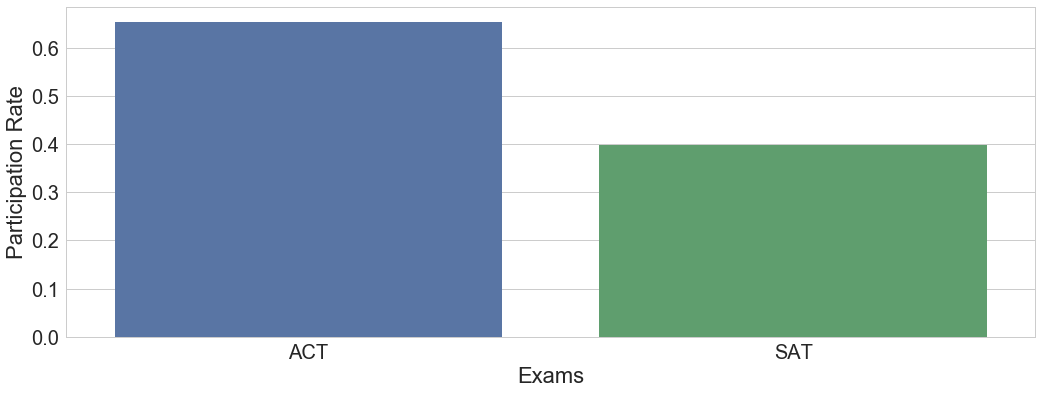

In [70]:
sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=df_means)
plt.xlabel('Exams')
plt.ylabel('Participation Rate')
plt.tight_layout();
plt.savefig('../plots/mean_part_rates')

In [71]:
act_required = country_exam_scores_df.loc[
    ['Kentucky', 'Louisiana', 'Mississippi', 'Missouri', 'Utah', 'Wisconsin'],
    ['participation_rate_act', 'participation_rate_sat']
]

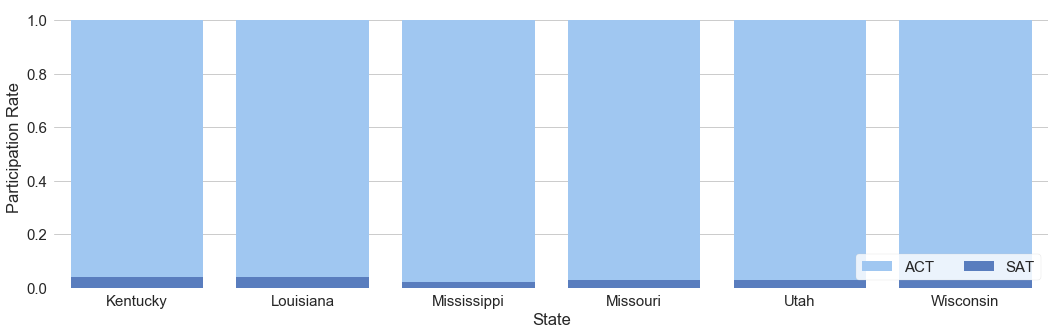

In [72]:
sns.set(style="whitegrid", font_scale=1.5)
f, ax = plt.subplots(figsize=(15, 5))
sns.set_color_codes("pastel")


sns.barplot(x=act_required.index, y="participation_rate_act", data=act_required, label="ACT", color='b')
sns.set_color_codes("muted")
sns.barplot(x=act_required.index, y="participation_rate_sat", data=act_required, label="SAT", color='b')


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Participation Rate",
       xlabel="State")
sns.despine(left=True, bottom=True)
plt.tight_layout();
plt.savefig('../plots/act_req.png')

In [73]:
country_exam_scores_df.head()

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
State,,,,,,,,,,
Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [74]:
low_act = country_exam_scores_df.sort_values('total_avg_act').head()

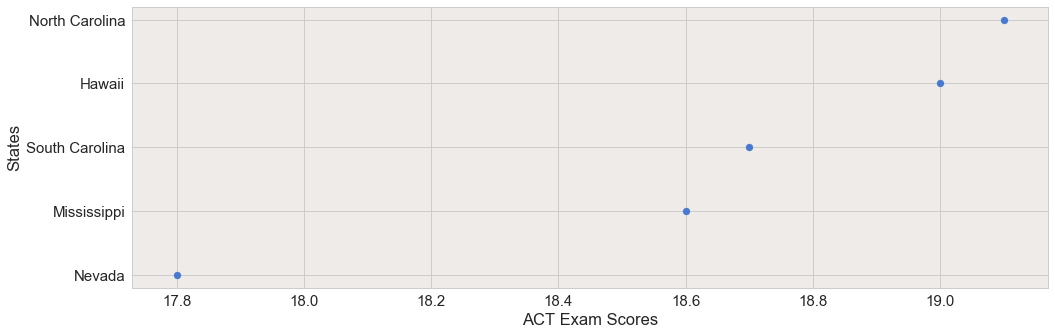

In [75]:
plt.figure(figsize=(15,5));
ax = plt.gca()
ax.set_facecolor('#eeebe8')
plt.scatter(low_act.total_avg_act, y=low_act.index, c='b');
plt.xlabel('ACT Exam Scores')
plt.ylabel('States')
plt.tight_layout();
plt.savefig('../plots/low_act')

In [76]:
low_act.head()

,participation_rate_sat,reading_writing_avg_sat,math_avg_sat,total_avg_sat,participation_rate_act,english_avg_act,math_avg_act,reading_avg_act,science_avg_act,total_avg_act
State,,,,,,,,,,
Nevada,0.26,563,553,1116,1.0,16.3,18.0,18.1,18.2,17.8
Mississippi,0.02,634,607,1242,1.0,18.2,18.1,18.8,18.8,18.6
South Carolina,0.50,543,521,1064,1.0,17.5,18.6,19.1,18.9,18.7
Hawaii,0.55,544,541,1085,0.9,17.8,19.2,19.2,19.3,19.0
North Carolina,0.49,546,535,1081,1.0,17.8,19.3,19.6,19.3,19.1


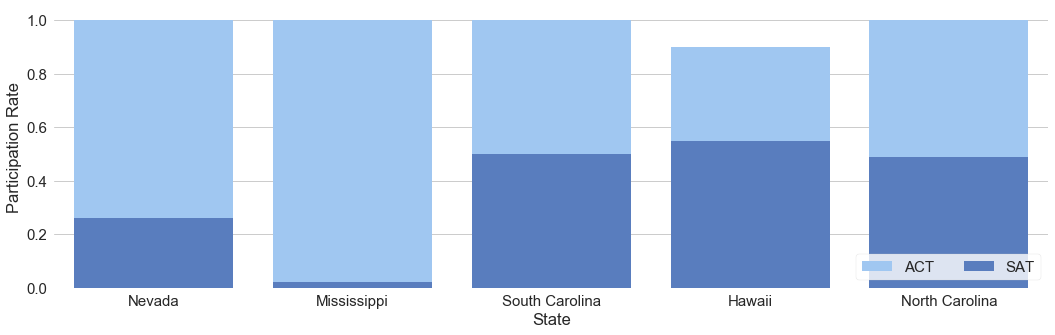

In [77]:
sns.set(style="whitegrid", font_scale=1.5)
f, ax = plt.subplots(figsize=(15, 5))
sns.set_color_codes("pastel")


sns.barplot(x=low_act.index, y="participation_rate_act", data=low_act, label="ACT", color='b')
sns.set_color_codes("muted")
sns.barplot(x=low_act.index, y="participation_rate_sat", data=low_act, label="SAT", color='b')


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Participation Rate",
       xlabel="State")
sns.despine(left=True, bottom=True)
plt.tight_layout();
plt.savefig('../plots/low_act_part_rates.png')

In [78]:
low_act.total_avg_sat.describe()

count       5.000000
mean     1117.600000
std        72.029855
min      1064.000000
25%      1081.000000
50%      1085.000000
75%      1116.000000
max      1242.000000
Name: total_avg_sat, dtype: float64

In [79]:
sat_low_act = low_act.total_avg_sat.mean()
sat_low_act

1117.6

In [80]:
country_max = country_exam_scores_df.total_avg_sat.max()
country_max

1295

In [81]:
sample_vs_max = pd.DataFrame(np.array([[sat_low_act, country_max]]), columns=['SAT Avg-Low ACT','SAT State Max'])
sample_vs_max

,SAT Avg-Low ACT,SAT State Max
0,1117.6,1295.0


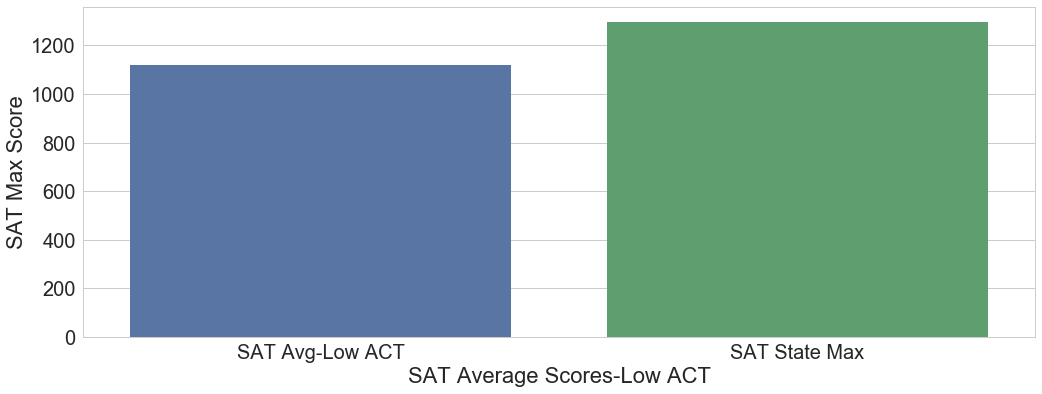

In [82]:
sns.set(style="whitegrid", font_scale=2)
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=sample_vs_max)
plt.xlabel('SAT Average Scores-Low ACT')
plt.ylabel('SAT Max Score')
plt.tight_layout();
plt.savefig('../plots/SAT Average Scores-Low ACT')